In [34]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import sqlite3
import os
import pandasql
from sqlalchemy import create_engine
from tqdm import tqdm
import matplotlib.pyplot as plt

0 : Music (400)

1 : personality (44)

2 : Depression (21)

3 : LSRP (psychopathy) (26)

4 : Dark personality (12)

5 : Innocuous (IPQ) (178) : Subtle dark personality

6 : Voice Samples about Suffering (12)

7 : Moral Dilemma (17)

8 : Social discounting (72) : You get 20 dollars vs your mother get 20 dollars

9 : Mood (8)

10 : SECRET : Jury Trial (1)


In [ ]:
conn = sqlite3.connect("machine2_new_aug.db") # Connect to the Machine2 db

In [ ]:
query='''
SELECT *
FROM music
'''

view = pd.read_sql_query(query,conn) # tested by Tom (3/4)

In [ ]:
view

,participantId,trialNumber,taskId,instanceId,familiarity,rating,arousal,joy,nostalgia,groove,...,anxiety,disgust,anger,no_emotion,reflection,boredom,rating_reaction_time,familiarity_reaction_time,arousal_reaction_time,emotion_reaction_time
0,97f4_7385706431,2,0,308,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97f4_7385706431,4,0,41,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,97f4_7385706431,6,0,142,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,97f4_7385706431,8,0,265,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,97f4_7385706431,10,0,103,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428795,zzru_7377077714,792,0,123,5.0,5.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.984,3.031,3.983,7.808
428796,zzru_7377077714,794,0,186,1.0,3.0,4.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.181,3.996,4.932,7.589
428797,zzru_7377077714,796,0,37,3.0,5.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.949,2.716,4.452,7.605
428798,zzru_7377077714,798,0,267,1.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.660,4.187,5.211,7.164


In [63]:
query='''
SELECT *
FROM music
INNER JOIN music_meta ON music.instanceId = music_meta.MusicId
'''

view = pd.read_sql_query(query,conn) # tested by Tom (3/4)

In [64]:
view

,participantId,trialNumber,taskId,instanceId,familiarity,rating,arousal,joy,nostalgia,groove,...,arousal_reaction_time,emotion_reaction_time,MusicId,SourceId,GenreId,Subgenre,Title,Artist,Year,Path
0,97f4_7385706431,2,0,308,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,308,4,9,Soundtrack,Lord of the Rings Theme,Howard Shore,2000,0308_lordOfTheRings_howardShore.mp4
1,97f4_7385706431,4,0,41,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41,1,9,Polka,My Favorite Polka,Frankie Yankovic,1957,0041_frankieYankovic_myFavoritePolka.mp4
2,97f4_7385706431,6,0,142,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,142,2,3,House,I Gotta Feeling,The Black Eyed Peas,2009,0142_theBlackEyedPeas_iGottaFeeling.mp4
3,97f4_7385706431,8,0,265,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,265,4,7,Arena,We Are The Champions,Queen,1977,0265_queen_weAreTheChampions.mp4
4,97f4_7385706431,10,0,103,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,103,2,5,Contemporary,Shape of You,Ed Sheeran,2017,0103_edSheeran_shapeOfYou.mp4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428795,zzru_7377077714,792,0,123,5.0,5.0,5.0,0.0,1.0,0.0,...,3.983,7.808,123,2,5,RnB/Swing,Blurred Lines,Robin Thicke featuring T.I. and Pharrell Williams,2013,0123_robinThickeFeaturingTIAndPharrellWilliams...
428796,zzru_7377077714,794,0,186,1.0,3.0,4.0,0.0,0.0,0.0,...,4.932,7.589,186,3,7,Heavy Metal,The Ripper,Judas Priest,1976,0186_judasPriest_theRipper.mp4
428797,zzru_7377077714,796,0,37,3.0,5.0,3.0,0.0,0.0,0.0,...,4.452,7.605,37,1,4,Traditional,The Way You Look Tonight,Oscar Peterson,1959,0037_oscarPeterson_theWayYouLookTonight.mp4
428798,zzru_7377077714,798,0,267,1.0,4.0,4.0,0.0,0.0,0.0,...,5.211,7.164,267,4,7,New Wave,Heart Of Glass,Blondie,1978,0267_blondie_heartOfGlass.mp4


In [65]:
query='''
SELECT AVG(groove) AS avg_groove, music_meta.*
FROM music
INNER JOIN music_meta ON music.instanceId = music_meta.MusicId
GROUP BY instanceId
ORDER BY avg_groove DESC
'''

view = pd.read_sql_query(query,conn) # tested by Tom (3/4)

In [66]:
view.head(20)

,avg_groove,MusicId,SourceId,GenreId,Subgenre,Title,Artist,Year,Path
0,0.734203,276,4,8,Disco,Stayin' Alive,Bee Gees,1977,0276_beeGees_stayinAlive.mp4
1,0.726083,245,4,5,Dance,Billie Jean,Michael Jackson,1982,0245_michaelJackson_billieJean.mp4
2,0.700701,277,4,8,Dance,Rock With You,Michael Jackson,1979,0277_michaelJackson_rockWithYou.mp4
3,0.694444,404,5,9,boogaloo,Vamonos Pal Monte,Eddie Palmieri,1905,0404_eddiePalmieri_vamonosPalMonte.mp4
4,0.694332,272,4,8,Funk,I Got You (I Feel Good),James Brown,1964,0272_jamesBrown_iGotYouFeelGood.mp4
5,0.676353,104,2,8,Contemporary,That's What I Like,Bruno Mars,2017,0104_brunoMars_thatsWhatILike.mp4
6,0.672000,244,4,5,Soul/Funk,Superstition,Stevie Wonder,1972,0244_stevieWonder_superstition.mp4
7,0.670000,344,5,8,quiet storm,Poison,Bell Biv DeVoe,1990,0344_bellBivDevoe_poison.mp4
8,0.659296,39,1,9,Latin,Mambo Numero Cinco,Hilton Ruiz,1992,0039_hiltonRuiz_mamboNumeroCinco.mp4
9,0.657921,114,2,6,Contemporary,Can't Feel My Face,The Weeknd,2015,0114_theWeeknd_cantFeelMyFace.mp4


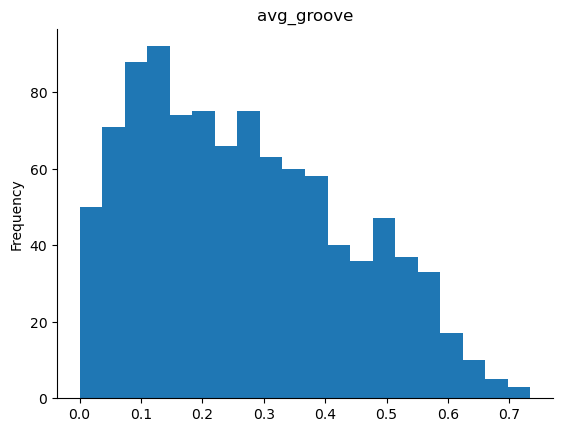

In [67]:
# @title avg_groove

from matplotlib import pyplot as plt
view['avg_groove'].plot(kind='hist', bins=20, title='avg_groove')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [68]:
query='''
SELECT AVG(arousal) AS avg_arousal, music_meta.*
FROM music
INNER JOIN music_meta ON music.instanceId = music_meta.MusicId
GROUP BY instanceId
ORDER BY avg_arousal DESC
'''

view = pd.read_sql_query(query,conn) # tested by Tom (3/4)

In [69]:
view.head(20)

,avg_arousal,MusicId,SourceId,GenreId,Subgenre,Title,Artist,Year,Path
0,5.873367,131,2,3,House,Party Rock Anthem,LMFAO featuring Lauren Bennett and GoonRock,2011,0131_lmfaoFeaturingLaurenBennettAndGoonrock_pa...
1,5.744000,144,2,3,House,Poker Face,Lady Gaga,2009,0144_ladyGaga_pokerFace.mp4
2,5.699900,142,2,3,House,I Gotta Feeling,The Black Eyed Peas,2009,0142_theBlackEyedPeas_iGottaFeeling.mp4
3,5.682460,148,2,3,House,So What,Pink,2008,0148_pink_soWhat.mp4
4,5.668004,133,2,3,House,Moves like Jagger,Maroon 5 featuring Christina Aguilera,2011,0133_maroon5FeaturingChristinaAguilera_movesLi...
5,5.645455,519,5,5,kids dance party,Cupid Shuffle,Cupid,2007,0519_cupid_cupidShuffle.mp4
6,5.607287,132,2,3,House,We Found Love,Rihanna featuring Calvin Harris,2011,0132_rihannaFeaturingCalvinHarris_weFoundLove.mp4
7,5.603604,20,1,5,Pop Punk,American Idiot,Green Day,2004,0020_greenDay_americanIdiot.mp4
8,5.600400,143,2,5,Contemporary,Boom Boom Pow,The Black Eyed Peas,2009,0143_theBlackEyedPeas_boomPow.mp4
9,5.568687,230,4,3,EDM,Levels,Avicii,2011,0230_avicii_levels.mp4


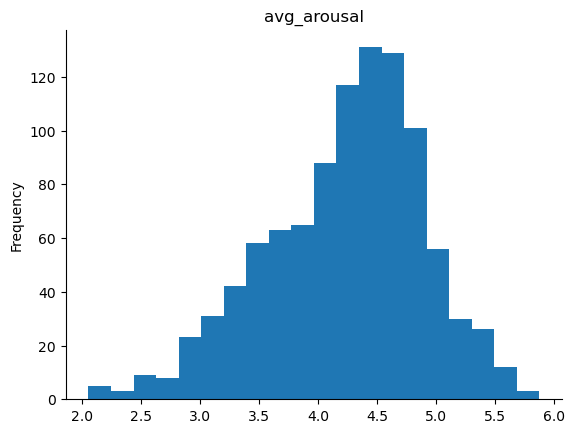

In [70]:
# @title avg_arousal

from matplotlib import pyplot as plt
view['avg_arousal'].plot(kind='hist', bins=20, title='avg_arousal')
plt.gca().spines[['top', 'right',]].set_visible(False)

## avg_rating

In [71]:
query='''
SELECT AVG(rating) AS avg_rating, AVG(rating_reaction_time) AS avg_react, *
FROM music
GROUP BY participantId
ORDER BY avg_rating DESC
'''

view = pd.read_sql_query(query,conn) # tested by Tom (3/4)

In [73]:
view['avg_react']

0       1.464794
1       2.375440
2       2.012235
3       5.193500
4       2.989890
          ...   
1067         NaN
1068         NaN
1069         NaN
1070         NaN
1071         NaN
Name: avg_react, Length: 1072, dtype: float64